In [143]:
import pandas as pd 
import numpy as np
from sklearn import preprocessing
data=pd.read_csv("final_data.csv")
#final preprocessed data

In [144]:
data.head()

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name,Average Data Speed Download,Average Data Speed Upload,Population,Literacy Rate,Rainfall,Area of the state,Average_Signal
0,Airtel,Indoor,4G,3,Satisfactory,0.196228,0.325356,Karnataka,0.271480,0.197512,2,7,3,0.504087,0.476721
1,Vodafone,Indoor,4G,1,Call Dropped,0.632907,0.135432,Gujarat,0.211519,0.370879,2,8,2,0.518040,0.477252
2,Airtel,Indoor,3G,1,Call Dropped,0.127093,0.290671,Tamil Nadu,0.036321,0.062303,2,8,2,0.300607,0.478454
3,Airtel,Indoor,4G,3,Satisfactory,0.580181,0.155327,Gujarat,0.175517,0.191200,2,8,2,0.518040,0.477699
4,Airtel,Travelling,4G,3,Satisfactory,0.425737,0.180503,Maharashtra,0.333021,0.395612,4,8,4,0.886194,0.476859


Finding out if Technology is related to Literacy Rate using chi square test.  It is believed that as the literacy rate is high, people tend to use more of internet and hence go for 4G instead of 3G.


H0: Network Type and Literacy Rate are independent of each other


HA: Network Type and Literacy Rate are dependent of each other

In [145]:
tgtotal=data[data['Network Type']=='3G'].count()[0]
#total number of objects with network type as 3G

In [146]:
fgtotal=data[data['Network Type']=='4G'].count()[0]
#total number of objects with network type as 4G

In [147]:
total=data.count()[0]
#total number of objects

In [148]:
fgtotal+tgtotal==total

True

In [149]:
sum=0
threeg=[]
fourg=[]
for i in range(0,10):
    x=data[data['Literacy Rate']==i].count()[0]
    #x represents number of objects with i value 
    z=(data[data['Network Type']=='4G']['Literacy Rate']==i).sum()
    #z represents number of objects with Literacy Rate as i value and network type as 4G
    y=(data[data['Network Type']=='3G']['Literacy Rate']==i).sum()
    #z represents number of objects with Literacy Rate as i value and network type as 4G
    threeg.append(y)
    #threeg is list consisting of all x values
    fourg.append(z)
    #fourg is list consisting of all z values
    if(x!=0):
        #this condition is used so that e1 and e2 donot become equal to zero and make sum as Nan 
        e1=(x*tgtotal)/total
        e2=(x*fgtotal)/total
        sum=sum+((y-e1)**2)/e1+((z-e2)**2)/e2
print(sum)  
#sum is the chi square statistic

681.720679497605


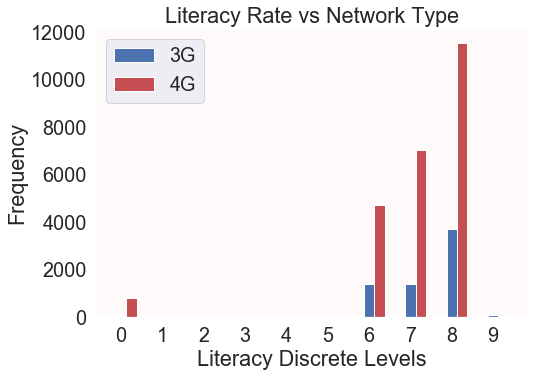

In [150]:
#Plotting the observed frequencies
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#sets the axes for the figure
ax.set_ylabel('Frequency')
#sets the y label as Frequency
ax.set_xlabel('Literacy Discrete Levels')
#sets the x label as Literacy Discrete Levels
ax.set_title('Literacy Rate vs Network Type')
#sets the title
ax.bar(X + 0.00, threeg, color = 'b', width = 0.25)
#plots the bargraph for 3G Network
ax.bar(X + 0.25, fourg, color = 'r', width = 0.25)
#plots the bargraph for 4G Network
ax.legend(labels=['3G', '4G'])
#adds the legend to the plot
ax.set_facecolor("snow")
bars = ('0', '1', '2', '3', '4','5','6','7','8','9')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
plt.grid(True, linewidth=0.5, color='#ff0000', linestyle='-')
#sets x ticks to the graph
ax.grid(False)
#removing the grids from the plot
plt.savefig('Literacy Rate vs Network Type.png',bbox_inches='tight')

In [151]:
r=2
c=10
dof=(r-1)*(c-1)

In [152]:
dof

9

From chi square table chi square value at 0.05 significance level=16.91897760
Hence sum>16.91897760 so we reject null hypothesis and hence there is significant relation between Network Type and Literacy rate.


Now we try to find if Rainfall affect the Rating. It can be assumed that increase in rainfall can decrease connectivity and hence decrese the rating.

H0: Rainfall and rating are independent of each other

H0: Rainfall and rating are dependent on each other

In [153]:
data['Rating'].unique()
#Ratings are in the range 1-5

array([3, 1, 5, 4, 2], dtype=int64)

In [154]:
a1=data[data['Rating']==1].count()[0]
#a1 is the count of objects with Rating=1
a2=data[data['Rating']==2].count()[0]
#a2 is the count of objects with Rating=2
a3=data[data['Rating']==3].count()[0]
#a3 is the count of objects with Rating=3
a4=data[data['Rating']==4].count()[0]
#a4 is the count of objects with Rating=4
a5=data[data['Rating']==5].count()[0]
#a5 is the count of objects with Rating=5

In [155]:
a1+a2+a3+a4+a5==total
#verification

True

In [156]:
sum=0
r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
for i in range(0,10):
    x=data[data['Rainfall']==i].count()[0]
    #x represents number of objects with i value 
    v1=(data[data['Rating']==1]['Rainfall']==i).sum()
    #v1 represents number of objects with Rainfall as i and Rating=1 
    v2=(data[data['Rating']==2]['Rainfall']==i).sum()
    #v2 represents number of objects with Rainfall as i and Rating=2 
    v3=(data[data['Rating']==3]['Rainfall']==i).sum()
    #v3 represents number of objects with Rainfall as i and Rating=3 
    v4=(data[data['Rating']==4]['Rainfall']==i).sum()
    #v4 represents number of objects with Rainfall as i and Rating=4 
    v5=(data[data['Rating']==5]['Rainfall']==i).sum()
    #v5 represents number of objects with Rainfall as i and Rating=5 
    r1.append(v1)
    r2.append(v2)
    r3.append(v3)
    r4.append(v4)
    r5.append(v5)
    if(x!=0):
        #this condition is used so that sum does not become Nan 
        e1=(x*a1)/total
        e2=(x*a2)/total
        e3=(x*a3)/total
        e4=(x*a4)/total
        e5=(x*a5)/total
        sum=sum+((v1-e1)**2)/e1+((v2-e2)**2)/e2+((v3-e3)**2)/e3+((v4-e4)**2)/e4+((v5-e5)**2)/e5
print(sum) 
#sum is the chi square statistic

2089.447885965678


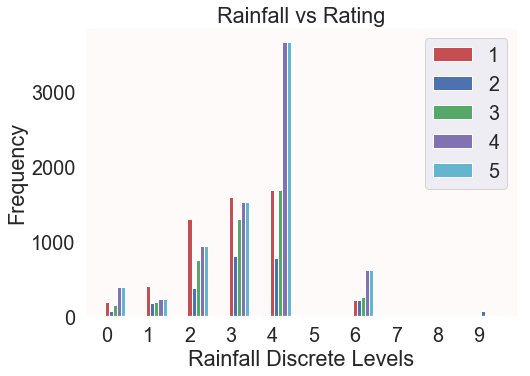

In [157]:
#Plotting the observed frequencies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#sets the axes for the figure
ax.set_ylabel('Frequency')
#sets the y label as Frequency
ax.set_xlabel('Rainfall Discrete Levels')
#sets the x label as Rainfall Discrete Levels
ax.set_title('Rainfall vs Rating')
#sets the title
ax.bar(X + 0.00, r1, color = 'r', width = 0.1)
#plots the bargraph for Rating=1
ax.bar(X + 0.1, r2, color = 'b', width = 0.1)
#plots the bargraph for Rating=2
ax.bar(X + 0.2, r3, color = 'g', width = 0.1)
#plots the bargraph for Rating=3
ax.bar(X + 0.3, r4, color = 'm', width = 0.1)
#plots the bargraph for Rating=4
ax.bar(X + 0.4, r4, color = 'c', width = 0.1)
#plots the bargraph for Rating=5
ax.legend(labels=['1', '2','3','4','5'])
#adds the legend to the plot
ax.set_facecolor("snow")
bars = ('0', '1', '2', '3', '4','5','6','7','8','9')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
#sets x ticks to the graph
ax.grid(False)
#removing the grids from the plot
plt.savefig('Rainfall vs Rating.png',bbox_inches='tight')

In [158]:
r=5
c=10
dof=(r-1)*(c-1)

In [159]:
dof

36

From chi square table chi square value at 0.05 significance level=50.99846017
Hence sum>50.99846017 so we reject null hypothesis and hence there is significant relation between Rating and Rainfall.

Now we try to find if Population affect the Rating. It can be assumed that where population is more, towers will be more and hence rating will be more

H0: Population and rating are independent of each other

H0: Population and rating are independent of each other

In [160]:
sum=0
r1=[]
r2=[]
r3=[]
r4=[]
r5=[]
for i in range(0,10):
    x=data[data['Population']==i].count()[0]
    #x represents number of objects with i value
    v1=(data[data['Rating']==1]['Population']==i).sum()
    #v1 represents number of objects with Rainfall as i and Rating=1
    v2=(data[data['Rating']==2]['Population']==i).sum()
    #v2 represents number of objects with Rainfall as i and Rating=2
    v3=(data[data['Rating']==3]['Population']==i).sum()
    #v3 represents number of objects with Rainfall as i and Rating=3
    v4=(data[data['Rating']==4]['Population']==i).sum()
    #v4 represents number of objects with Rainfall as i and Rating=4
    v5=(data[data['Rating']==5]['Population']==i).sum()
    #v5 represents number of objects with Rainfall as i and Rating=5
    r1.append(v1)
    r2.append(v2)
    r3.append(v3)
    r4.append(v4)
    r5.append(v5)
    if(x!=0):
        #this condition is used so that sum does not become Nan
        e1=(x*a1)/total
        e2=(x*a2)/total
        e3=(x*a3)/total
        e4=(x*a4)/total
        e5=(x*a5)/total
        sum=sum+((v1-e1)**2)/e1+((v2-e2)**2)/e2+((v3-e3)**2)/e3+((v4-e4)**2)/e4+((v5-e5)**2)/e5
print(sum) 
#sum is the chi square statistic

3132.818801519578


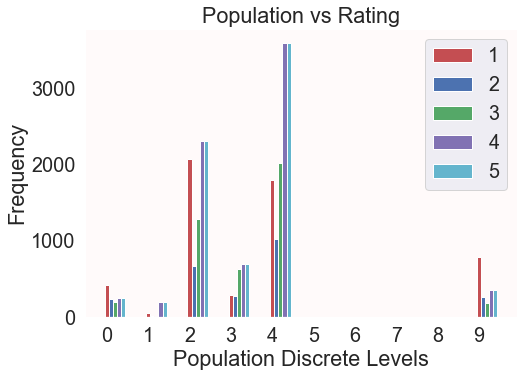

In [161]:
#Plotting the observed frequencies
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
#sets the axes for the figure
ax.set_ylabel('Frequency')
#sets the y label as Frequency
ax.set_xlabel('Population Discrete Levels')
#sets the x label as Rainfall Discrete Levels
ax.set_title('Population vs Rating')
#sets the title
ax.bar(X + 0.00, r1, color = 'r', width = 0.1)
#plots the bargraph for Rating=1
ax.bar(X + 0.1, r2, color = 'b', width = 0.1)
#plots the bargraph for Rating=2
ax.bar(X + 0.2, r3, color = 'g', width = 0.1)
#plots the bargraph for Rating=3
ax.bar(X + 0.3, r4, color = 'm', width = 0.1)
#plots the bargraph for Rating=4
ax.bar(X + 0.4, r4, color = 'c', width = 0.1)
#plots the bargraph for Rating=5
ax.legend(labels=['1', '2','3','4','5'])
#adds the legend to the plot
ax.set_facecolor("snow")
bars = ('0', '1', '2', '3', '4','5','6','7','8','9')
y_pos = np.arange(len(bars))
plt.xticks(y_pos, bars)
#sets x ticks to the graph
ax.grid(False)
#removing the grids from the plot
plt.savefig('Population vs Rating.png',bbox_inches='tight')

In [162]:
r=5
c=10
dof=(r-1)*(c-1)

In [163]:
dof

36

From chi square table chi square value at 0.05 significance level=50.99846017
Hence sum>50.99846017 so we reject null hypothesis and hence there is significant relation between Rating and Population.